In [1]:
from lale.grammar import Grammar
from lale.operators import make_choice
from lale import wrap_imported_operators

# Simple: First example

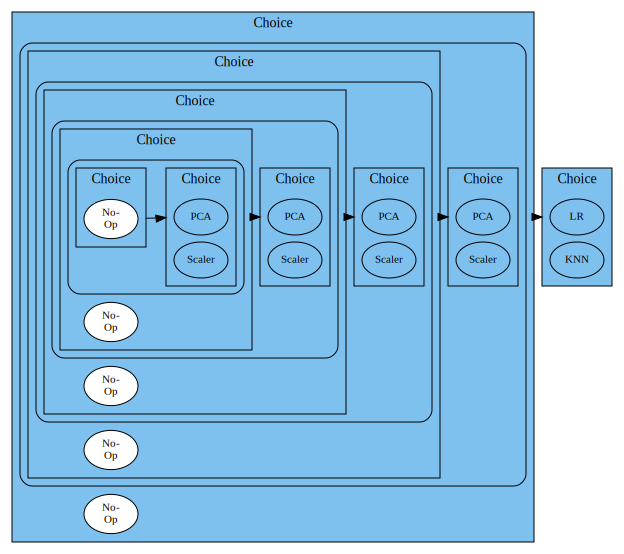

In [2]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
from lale.lib.lale import NoOp
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = (NoOp | g.transformer) >> g.prim_est
g.transformer = (NoOp | g.transformer) >> g.prim_tfm

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler

generated = g.unfold(6)
generated.visualize()

## Training

 67%|████████    | 4/6 [00:08<00:03,  1.91s/it, best loss: -0.9505575551782683]

  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 155, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 148, in hyperopt_train_test
    raise e
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 128, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 249, in cross_val_score_track_trials
    score_value  = scorer(trained, X_test, y_test)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/metrics/scorer.py", line 91, in __call__
    y_pred = estimator.predict(X)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1981, in predict
    output = operator.predict(X = inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.

100%|████████████| 6/6 [00:10<00:00,  1.49s/it, best loss: -0.9505575551782683]


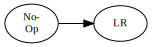

In [3]:
from lale.lib.lale import Hyperopt
import lale.datasets
(train_X, train_y), (test_X, test_y) = lale.datasets.load_iris_df()

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

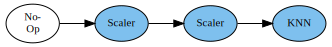

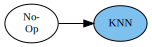

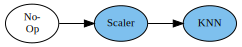

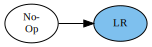

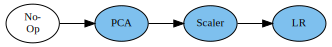

In [4]:
pool = {g.sample(10) for _ in range(5)}
for tree in pool:
    tree.visualize()

 83%|██████████  | 5/6 [00:08<00:01,  1.77s/it, best loss: -0.9383575551782682]

  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 155, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 148, in hyperopt_train_test
    raise e
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 128, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 249, in cross_val_score_track_trials
    score_value  = scorer(trained, X_test, y_test)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/metrics/scorer.py", line 91, in __call__
    y_pred = estimator.predict(X)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1981, in predict
    output = operator.predict(X = inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.

100%|████████████| 6/6 [00:09<00:00,  1.54s/it, best loss: -0.9383575551782682]


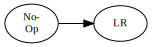

In [5]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# Grammar that exercices all combinators

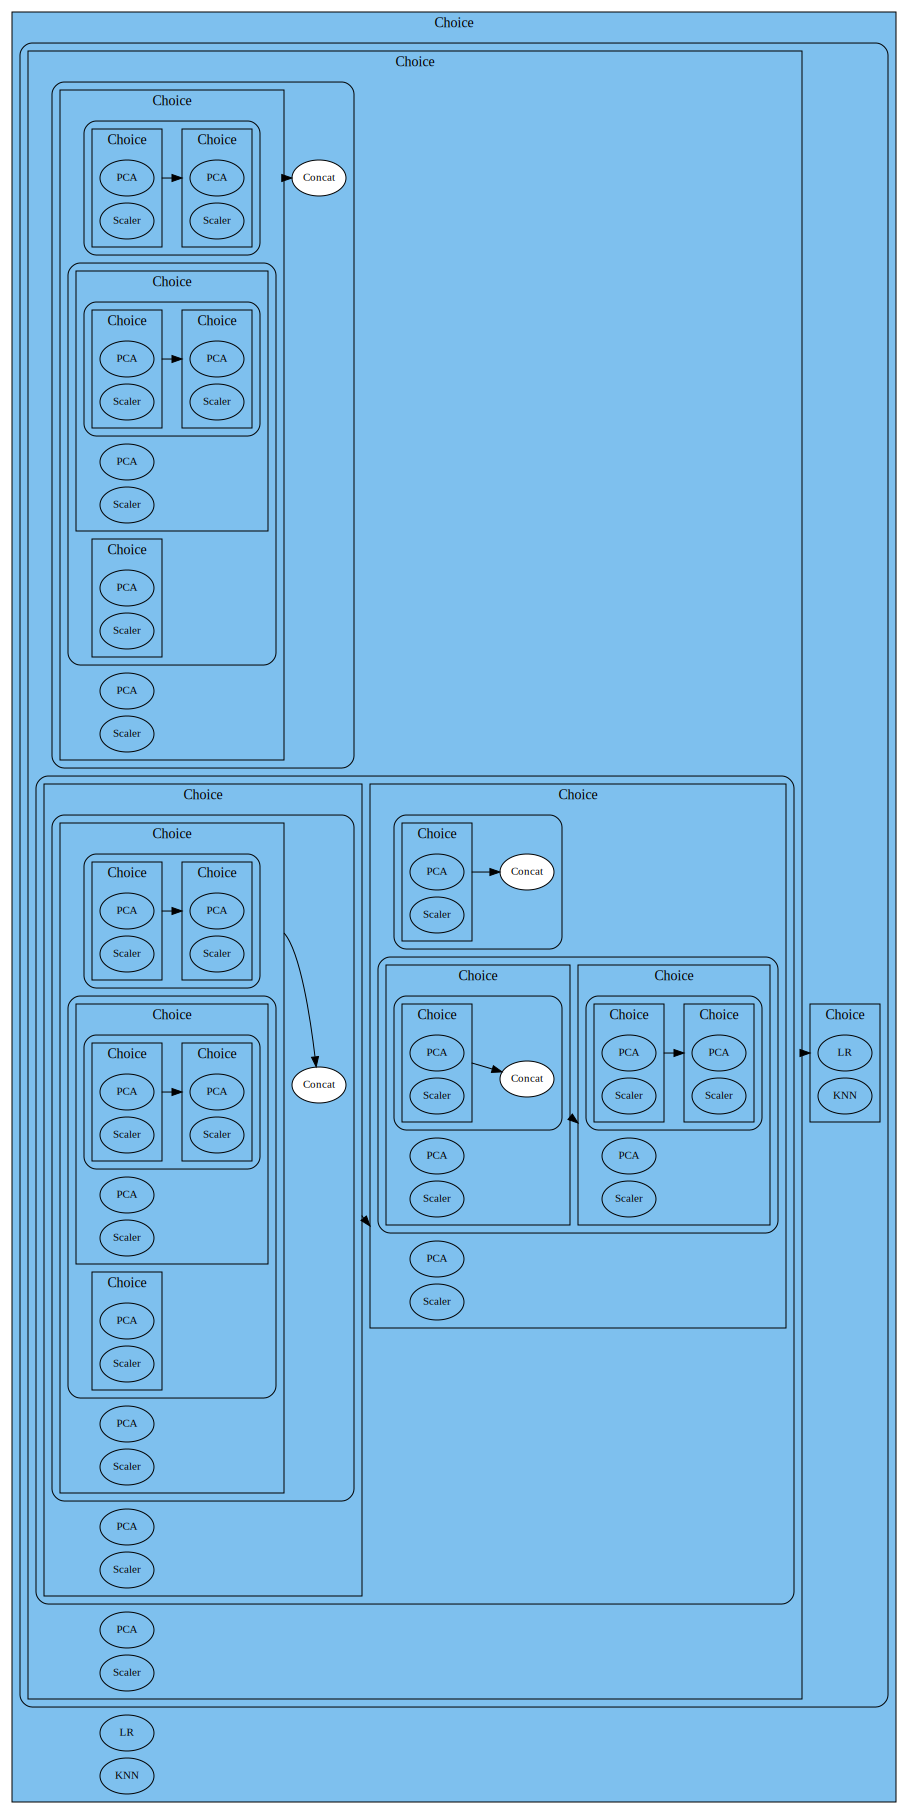

In [6]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler as Scaler
from sklearn.ensemble import AdaBoostClassifier as Boost
from lale.lib.lale import ConcatFeatures as Concat
wrap_imported_operators()

g = Grammar()

g.start       = g.estimator
g.estimator   = g.term_est | g.transformer >> g.term_est
g.term_est    = g.prim_est #| g.ensemble
#g.ensemble    = Boost ( base_estimator = LR )
g.transformer = g.union_tfm | g.union_tfm >> g.transformer
g.union_tfm   = g.prim_tfm | g.union_body >> Concat
g.union_body  = g.transformer | g.transformer & g.union_body

g.prim_est    = LR | KNN
g.prim_tfm    = PCA | Scaler
g.ensembler   = Boost

generated = g.unfold(7)
generated.visualize()

 33%|████        | 1/3 [00:01<00:03,  1.95s/it, best loss: -0.8889151103565365]

  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 246, in cross_val_score_track_trials
    trained = estimator_copy.fit(X_train, y_train)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1643, in fit
    self.validate_schema(X, y)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1542, in validate_schema
    self._validate_or_transform_schema(X, y, validate=True)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1532, in _validate_or_transform_schema
    output = operator.transform_schema(inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1172, in transform_schema
    return self._impl.transform_schema(s_X)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/concat_features.py", line 93, in transform_schema
    assert 'items' in s_dataset, lale.pretty_print.to_string(s_dataset)
  File "/home/hirzel/git/hirzel/lale/lale/pretty_print.py", line 334, in to_string
    raise ValueError(f'Unexpected argument type {type(arg)} for

 67%|████████    | 2/3 [00:03<00:01,  1.82s/it, best loss: -0.8889151103565365]

  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 246, in cross_val_score_track_trials
    trained = estimator_copy.fit(X_train, y_train)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1643, in fit
    self.validate_schema(X, y)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1542, in validate_schema
    self._validate_or_transform_schema(X, y, validate=True)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1532, in _validate_or_transform_schema
    output = operator.transform_schema(inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1172, in transform_schema
    return self._impl.transform_schema(s_X)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/concat_features.py", line 93, in transform_schema
    assert 'items' in s_dataset, lale.pretty_print.to_string(s_dataset)
  File "/home/hirzel/git/hirzel/lale/lale/pretty_print.py", line 334, in to_string
    raise ValueError(f'Unexpected argument type {type(arg)} for

100%|████████████| 3/3 [00:05<00:00,  1.75s/it, best loss: -0.8889151103565365]


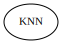

In [7]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

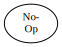

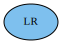

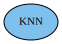

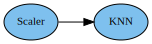

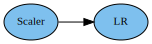

In [8]:
pool = {g.sample(20) for _ in range(5)}
for tree in pool:
    tree.visualize()

 17%|██          | 1/6 [00:01<00:08,  1.66s/it, best loss: -0.8648363327674023]

  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 155, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 148, in hyperopt_train_test
    raise e
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 128, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 249, in cross_val_score_track_trials
    score_value  = scorer(trained, X_test, y_test)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/metrics/scorer.py", line 91, in __call__
    y_pred = estimator.predict(X)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1981, in predict
    output = operator.predict(X = inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.

 33%|████        | 2/6 [00:02<00:05,  1.37s/it, best loss: -0.8648363327674023]

  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 155, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 148, in hyperopt_train_test
    raise e
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 128, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 249, in cross_val_score_track_trials
    score_value  = scorer(trained, X_test, y_test)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/metrics/scorer.py", line 91, in __call__
    y_pred = estimator.predict(X)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1215, in predict
    result = self._impl.predict(X)
AttributeError: 'NoOpImpl' object has no attribute 'predict

 50%|██████      | 3/6 [00:02<00:03,  1.08s/it, best loss: -0.8648363327674023]

  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 155, in proc_train_test
    score, logloss, execution_time = hyperopt_train_test(params, X_train=X_train, y_train=y_train)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 148, in hyperopt_train_test
    raise e
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/hyperopt.py", line 128, in hyperopt_train_test
    cv_score, logloss, execution_time = cross_val_score_track_trials(trainable, X_train, y_train, cv=self.cv, scoring=self.scoring)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 249, in cross_val_score_track_trials
    score_value  = scorer(trained, X_test, y_test)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/metrics/scorer.py", line 91, in __call__
    y_pred = estimator.predict(X)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1215, in predict
    result = self._impl.predict(X)
AttributeError: 'NoOpImpl' object has no attribute 'predict

100%|████████████| 6/6 [00:04<00:00,  1.15it/s, best loss: -0.9014363327674024]


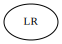

In [9]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# recipe: grammar from this [paper](https://link.springer.com/chapter/10.1007/978-3-319-55696-3_16)

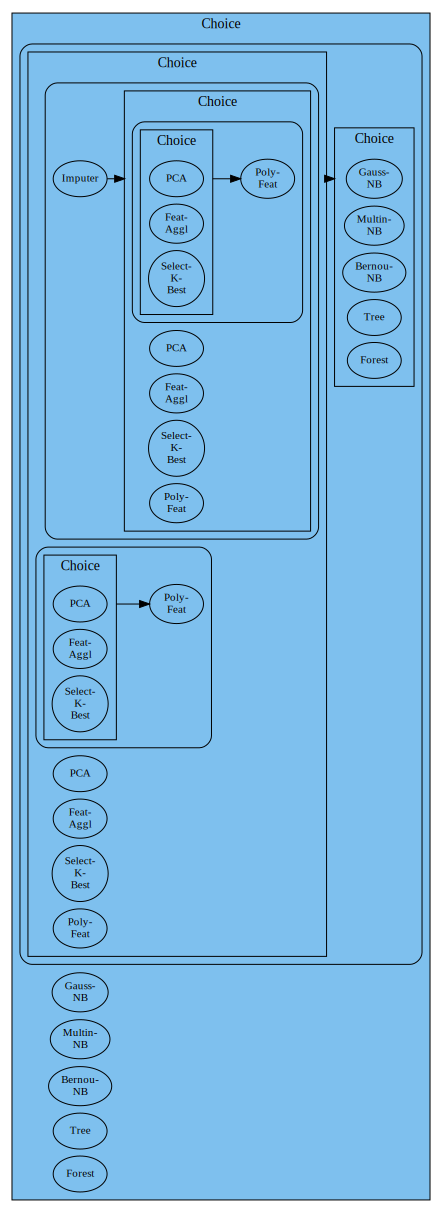

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import FeatureAgglomeration as FeatAggl
from sklearn.preprocessing import PolynomialFeatures as PolyFeat
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.naive_bayes import MultinomialNB as MultinNB
from sklearn.naive_bayes import BernoulliNB as BernouNB
from sklearn.impute import SimpleImputer as Imputer
from sklearn.ensemble import RandomForestClassifier as Forest
from sklearn.tree import DecisionTreeClassifier as Tree
from sklearn.feature_selection import SelectKBest
wrap_imported_operators()

g = Grammar()

g.start = g.algorithm | g.preprocessing >> g.algorithm
g.preprocessing = g.imputation >> g.dimensionality_definition | g.dimensionality_definition
g.dimensionality_definition = g.feature_selection >> g.feature_construction | g.feature_selection | g.feature_construction
g.feature_selection = g.unsupervised | g.supervised 
g.algorithm = g.naive_bayes | g.trees

g.imputation = Imputer
g.supervised = SelectKBest
g.unsupervised = PCA | FeatAggl
g.feature_construction = PolyFeat
g.naive_bayes = GaussNB | MultinNB | BernouNB
g.trees = Tree | Forest


generated = g.unfold(5)
generated.visualize()

100%|████████████| 3/3 [00:05<00:00,  1.72s/it, best loss: -0.9139575551782683]


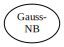

In [11]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

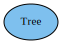

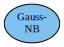

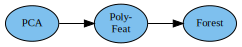

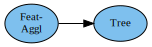

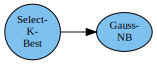

In [12]:
import sys
pool = {g.sample(30) for _ in range(5)}
for tree in pool:
    if tree is None:
        print('None', file=sys.stderr)
    else:
        tree.visualize()

  0%|                                      | 0/6 [00:00<?, ?it/s, best loss: ?]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 929, in _configure
    helpers.validate_schema(params_all, self.hyperparam_schema())
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 122, in validate_schema
    jsonschema.validate(json_value, schema)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/jsonschema/validators.py", line 541, in validate
    cls(schema, *args, **kwargs).validate(instance)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/jsonschema/validators.py", line 130, in validate
    raise error
jsonschema.exceptions.ValidationError: None is not of type 'integer'

Failed validating 'type' in schema['allOf'][0]['properties']['n_clusters']:
    {'default': 2,
     'description': 'The number of clusters to find.',
     'maximumForOptimizer': 8,
     'minimumForOptimizer': 2,
     'type': 'integer'}

On instance['n_clusters']:
    None

The above exception was the direct cause of the following exception:

Traceback (most rec

 17%|█████                         | 1/6 [00:00<00:03,  1.65it/s, best loss: ?]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 929, in _configure
    helpers.validate_schema(params_all, self.hyperparam_schema())
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 122, in validate_schema
    jsonschema.validate(json_value, schema)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/jsonschema/validators.py", line 541, in validate
    cls(schema, *args, **kwargs).validate(instance)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/jsonschema/validators.py", line 130, in validate
    raise error
jsonschema.exceptions.ValidationError: None is not of type 'integer'

Failed validating 'type' in schema['allOf'][0]['properties']['n_clusters']:
    {'default': 2,
     'description': 'The number of clusters to find.',
     'maximumForOptimizer': 8,
     'minimumForOptimizer': 2,
     'type': 'integer'}

On instance['n_clusters']:
    None

The above exception was the direct cause of the following exception:

Traceback (most rec

100%|████████████| 6/6 [00:07<00:00,  1.40s/it, best loss: -0.9139575551782683]


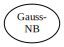

In [13]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# alphad3m: Grammar from this [paper](https://www.automl.org/wp-content/uploads/2019/06/automlws2019_Paper34.pdf)

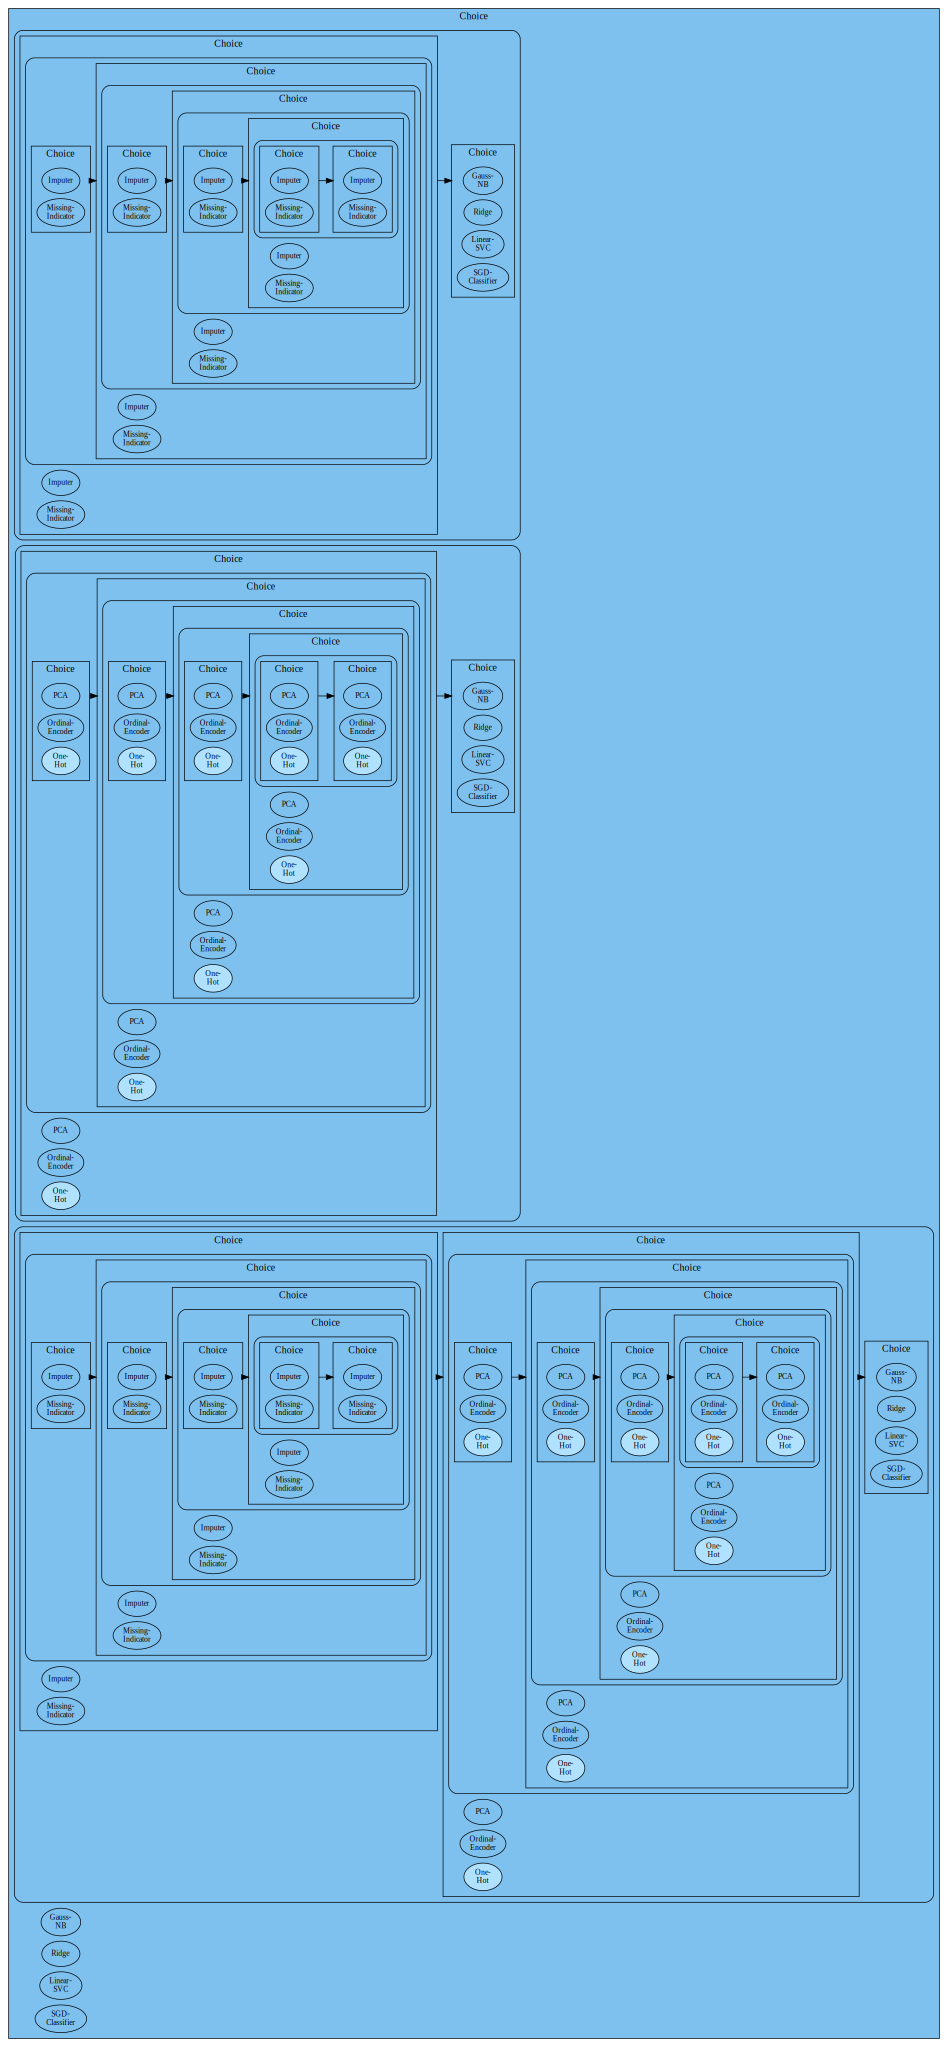

In [14]:
from sklearn.impute import SimpleImputer as Imputer
from sklearn.impute import MissingIndicator
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB as GaussNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import OneHotEncoder as OneHot
from sklearn.preprocessing import OrdinalEncoder
wrap_imported_operators()

g = Grammar()

g.start  = g.est | g.clean >> g.est | g.tfm >> g.est | g.clean >> g.tfm >> g.est
g.clean  = g.clean1 >> g.clean | g.clean1
g.tfm    = g.tfm1 >> g.tfm | g.tfm1

g.clean1 = Imputer | MissingIndicator
g.tfm1   = PCA | OrdinalEncoder | OneHot(handle_unknown='ignore')
g.est    = GaussNB | Ridge  | LinearSVC | SGDClassifier

generated = g.unfold(6)
generated.visualize()

 67%|███████▎   | 2/3 [00:07<00:03,  3.44s/it, best loss: -0.45581188455008487]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 857, in _validate_input_schema
    lale.helpers.validate_schema_or_subschema(arg, sup)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 135, in validate_schema_or_subschema
    validate_subschema(sub_schema, super_schema)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 173, in validate_subschema
    raise SubschemaError(sub, sup, sub_name, sup_name)
lale.helpers.SubschemaError: Expected sub to be a subschema of super.
sub = {
    'description': 'The missing indicator for input data.',
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'boolean'}}}
super = {
    'description': 'Features; the outer array is over samples.',
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'number'}}}

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/hirz

100%|███████████| 3/3 [00:09<00:00,  3.17s/it, best loss: -0.45581188455008487]


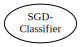

In [15]:
trainer = Hyperopt(estimator=generated, cv=2, max_evals=3, scoring='r2')
trained = trainer.fit(train_X, train_y)
if trained.get_pipeline() is None:
    print('None', file=sys.stderr)
else:
    trained.get_pipeline().visualize()

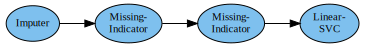

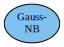

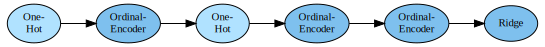

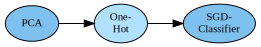

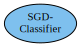

In [16]:
pool = {g.sample(10) for _ in range(5)}
for tree in pool:
    tree.visualize()

 29%|████          | 2/7 [00:05<00:12,  2.49s/it, best loss: 1.558485908319185]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 857, in _validate_input_schema
    lale.helpers.validate_schema_or_subschema(arg, sup)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 135, in validate_schema_or_subschema
    validate_subschema(sub_schema, super_schema)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 173, in validate_subschema
    raise SubschemaError(sub, sup, sub_name, sup_name)
lale.helpers.SubschemaError: Expected sub to be a subschema of super.
sub = {
    'description': 'The missing indicator for input data.',
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'boolean'}}}
super = {
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'number'}},
    'description': 'Input data, where ``n_samples`` is the number of samples and'}

The above exception was the direct cause of the following exception:

Traceback (most recent call last):


 43%|██████        | 3/7 [00:05<00:08,  2.01s/it, best loss: 1.558485908319185]

  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 857, in _validate_input_schema
    lale.helpers.validate_schema_or_subschema(arg, sup)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 135, in validate_schema_or_subschema
    validate_subschema(sub_schema, super_schema)
  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 173, in validate_subschema
    raise SubschemaError(sub, sup, sub_name, sup_name)
lale.helpers.SubschemaError: Expected sub to be a subschema of super.
sub = {
    'description': 'The missing indicator for input data.',
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'boolean'}}}
super = {
    'type': 'array',
    'items': {
        'type': 'array',
        'items': {
            'type': 'number'}},
    'description': 'Input data, where ``n_samples`` is the number of samples and'}

The above exception was the direct cause of the following exception:

Traceback (most recent call last):


 71%|████████▌   | 5/7 [00:08<00:03,  1.69s/it, best loss: -0.9139575551782683]

  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 246, in cross_val_score_track_trials
    trained = estimator_copy.fit(X_train, y_train)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1673, in fit
    trained = trainable.fit(X = inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1016, in fit
    trained_impl = self._impl.fit(X, y, **filtered_fit_params)
  File "/home/hirzel/git/hirzel/lale/lale/lib/sklearn/ordinal_encoder.py", line 26, in fit
    self._sklearn_model.fit(X, y)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py", line 796, in fit
    self._fit(X)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py", line 61, in _fit
    X = self._check_X(X)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py", line 47, in _check_X
    X_temp = check_array(X, dtype=None)
  File "/home/hirzel/python3.6venv/li

100%|████████████| 7/7 [00:11<00:00,  1.57s/it, best loss: -0.9139575551782683]


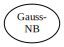

In [17]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=7, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()

# TPot: Grammar inferred from this [paper](https://dl.acm.org/doi/pdf/10.1145/2908812.2908918)

In [18]:
# from sklearn.preprocessing import StandardScaler as SScaler
# from sklearn.preprocessing import RobustScaler as RScaler
# from sklearn.preprocessing import PolynomialFeatures as PolyFeat
# from sklearn.decomposition import PCA
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import RFE
# from sklearn.feature_selection import SelectPercentile
# from sklearn.feature_selection import VarianceThreshold
# from sklearn.tree import DecisionTreeClassifier as Tree
# from sklearn.ensemble import RandomForestClassifier as Forest
# from sklearn.ensemble import GradientBoostingClassifier as Gradient
# from sklearn.svm import SVC as SVM
# from sklearn.linear_model import LogisticRegression as LR
# from sklearn.neighbors import KNeighborsClassifier as KNN
# from lale.lib.lale import ConcatFeatures as Concat

from sklearn.preprocessing import StandardScaler as PreProcess
from sklearn.decomposition import PCA as Decomposition
from sklearn.feature_selection import SelectKBest as Feature
from sklearn.tree import DecisionTreeClassifier as Model
from lale.lib.lale import ConcatFeatures as Concat
from lale.lib.lale import NoOp

wrap_imported_operators()

g = Grammar()

g.start = g.tree >> g.model
g.tree = g.node | g.tree >> g.node | (g.tree & g.tree) >> Concat
g.node = g.preprocessing | g.decomposition | g.feature_selection | g.model \
#        | (g.node & g.node) >> Concat \
#        | g.node >> g.node


g.preprocessing = PreProcess
g.decomposition = Decomposition
g.feature_selection = Feature
g.model = Model

# g.preprocessing = SScaler | RScaler | PolyFeat
# g.decomposition = PCA
# g.feature_selection = SelectKBest | RFE | SelectPercentile | VarianceThreshold
# g.model = Tree | Forest | Gradient | SVM | LR | KNN


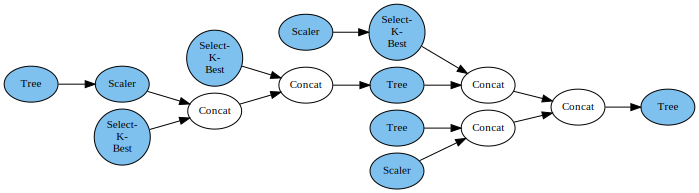

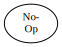

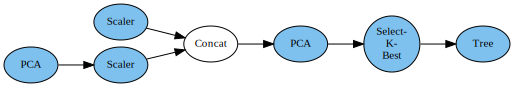

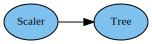

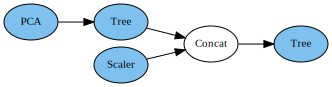

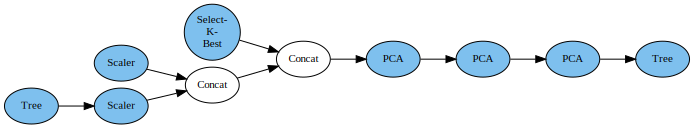

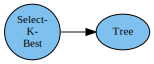

In [19]:
pool = {g.sample(15) for _ in range(10)}
for tree in pool:
    tree.visualize()

 17%|██          | 1/6 [00:03<00:15,  3.15s/it, best loss: -0.9383575551782682]

  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 246, in cross_val_score_track_trials
    trained = estimator_copy.fit(X_train, y_train)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1671, in fit
    trained = trainable.fit(X = inputs, y = y)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1016, in fit
    trained_impl = self._impl.fit(X, y, **filtered_fit_params)
  File "/home/hirzel/git/hirzel/lale/lale/lib/sklearn/select_k_best.py", line 33, in fit
    self._sklearn_model.fit(X, y)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py", line 348, in fit
    self._check_params(X, y)
  File "/home/hirzel/python3.6venv/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py", line 514, in _check_params
    % (X.shape[1], self.k))
ValueError: k should be >=0, <= n_features = 4; got 14.67078752489468. Use k='all' to return all features.

During handling of the above e

 50%|██████      | 3/6 [00:08<00:08,  2.91s/it, best loss: -0.9383575551782682]

  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 246, in cross_val_score_track_trials
    trained = estimator_copy.fit(X_train, y_train)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1643, in fit
    self.validate_schema(X, y)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1542, in validate_schema
    self._validate_or_transform_schema(X, y, validate=True)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1532, in _validate_or_transform_schema
    output = operator.transform_schema(inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1172, in transform_schema
    return self._impl.transform_schema(s_X)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/concat_features.py", line 93, in transform_schema
    assert 'items' in s_dataset, lale.pretty_print.to_string(s_dataset)
  File "/home/hirzel/git/hirzel/lale/lale/pretty_print.py", line 334, in to_string
    raise ValueError(f'Unexpected argument type {type(arg)} for

 83%|██████████  | 5/6 [00:22<00:05,  5.16s/it, best loss: -0.9383575551782682]

  File "/home/hirzel/git/hirzel/lale/lale/helpers.py", line 246, in cross_val_score_track_trials
    trained = estimator_copy.fit(X_train, y_train)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1643, in fit
    self.validate_schema(X, y)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1542, in validate_schema
    self._validate_or_transform_schema(X, y, validate=True)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1532, in _validate_or_transform_schema
    output = operator.transform_schema(inputs)
  File "/home/hirzel/git/hirzel/lale/lale/operators.py", line 1172, in transform_schema
    return self._impl.transform_schema(s_X)
  File "/home/hirzel/git/hirzel/lale/lale/lib/lale/concat_features.py", line 93, in transform_schema
    assert 'items' in s_dataset, lale.pretty_print.to_string(s_dataset)
  File "/home/hirzel/git/hirzel/lale/lale/pretty_print.py", line 334, in to_string
    raise ValueError(f'Unexpected argument type {type(arg)} for

100%|████████████| 6/6 [00:26<00:00,  4.79s/it, best loss: -0.9383575551782682]


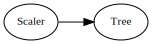

In [20]:
generated = make_choice(*pool)

trainer = Hyperopt(estimator=generated, cv=2, max_evals=6, scoring='r2')
trained = trainer.fit(train_X, train_y)
trained.get_pipeline().visualize()